In [1]:
### Importing Dependencies ###
import pandas as pd
import numpy as np
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
from random import choices
from itertools import product
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.feature_selection import RFE
from imblearn.over_sampling import RandomOverSampler as OverSampler
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imbPipeline
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
### Reading the data ###
data = pd.read_csv('data_unbalanced.csv')

In [3]:
### The id column is not needed###
data.drop('id', axis= 1, inplace= True)

### Getting summary statistics:

In [4]:
data.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40
count,6136.000000,5917.000000,6136.000000,6136.000000,6136.000000,6136.000000,6136.000000,6136.000000,6136.000000,6136.000000,...,6136.000000,6136.000000,6136.000000,6136.000000,6136.000000,6136.000000,6136.000000,6136.000000,6136.000000,6136.000000
mean,608.100986,0.314179,0.140156,0.016949,0.012060,0.039439,0.012223,0.015319,0.016949,0.072197,...,2.992829,5.012844,0.505541,0.498859,0.499185,0.492666,0.499674,0.491525,4.978611,2.997555
std,10474.385475,0.464227,0.347178,0.129091,0.109163,0.194654,0.109889,0.122830,0.129091,0.258835,...,1.399015,2.875602,0.500010,0.500039,0.500040,0.499987,0.500041,0.499969,2.875238,1.432591
min,7.236700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.001000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003000,1.000000
25%,267.757900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,2.520000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.497000,2.000000
50%,398.018500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,4.999500,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.958000,3.000000
75%,484.858900,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,7.521500,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.485000,4.000000
max,474192.004200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,9.999000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,5.000000


In [5]:
data.groupby('y').agg('mean')

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40
y,,,,,,,,,,,,,,,,,,,,,
TYPE0,749.809493,0.251829,0.206280,0.024364,0.018950,0.029237,0.007851,0.018408,0.027883,0.087439,...,2.987277,4.995193,0.507851,0.493232,0.499729,0.490796,0.497834,0.494315,5.008830,2.977531
TYPE1,435.984037,0.403081,0.028750,0.007500,0.000000,0.058125,0.000000,0.013125,0.000625,0.058125,...,2.991875,5.011886,0.501250,0.506875,0.498125,0.496875,0.500625,0.493125,4.965037,3.005625
TYPE2,313.464278,0.417391,0.061758,0.002375,0.004751,0.048694,0.054632,0.005938,0.000000,0.032067,...,3.019002,5.092103,0.503563,0.508314,0.498812,0.492874,0.505938,0.476247,4.871827,3.070071


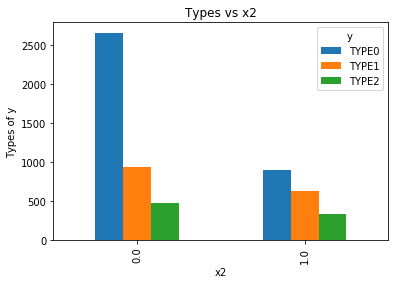

In [6]:
### Although the EDA/visualization on characteristically unknown variables does not make sense, 
### it could still be achieved through the following piece of code...
### Getting summary plots and statistics on categorical variables ###
pd.crosstab(data.x2,data.y).plot(kind='bar')
plt.title('Types vs x2')
plt.xlabel('x2')
plt.ylabel('Types of y')
plt.show()

-  x2 is a categorical variable and rest all the columns which have missing values are continuous variables.
-  Also, x28 contains 5900 missing values, and can be easily dropped since the total number of records are 6136.

## Handling missing data

-  I'll be using mode of the values to impute missing data in categorical variables.
-  For continuous variables yet anotther imputation technique, such as mean, will be used.
- Keep in mind that these imputation techiques will most likely introduce bias to the data and hence should be used with caution. You should choose according to your model needs.

In [7]:
### Imputing missing values for continuous and categorical data ###

### Categorical data ###
imputer_cat = Imputer(missing_values= 'NaN', strategy= 'most_frequent')
x2_new = imputer_cat.fit_transform(pd.DataFrame(data.x2))
x2_new = pd.DataFrame(x2_new, columns= ['x2'])

In [8]:
### Continuous Variable ###
imputer_cont = Imputer(missing_values= 'NaN', strategy= 'mean')
data_many_new = imputer_cont.fit_transform(data.loc[:, ['x18', 'x20', 'x22', 'x24', 'x26']])

data_many_new = pd.DataFrame(data_many_new, columns= ['x18', 'x20', 'x22', 'x24', 'x26'])
data.drop(['x2', 'x18', 'x20', 'x22', 'x24', 'x26', 'x28'], inplace= True, axis= 1)
data = pd.concat([data, x2_new,data_many_new] ,axis = 1)

In [9]:
### Validating ###
sum(data.isnull().sum())

0

In [10]:
data_x = data.drop(['y'], axis = 1)
data_y = data['y']

In [11]:
### Splitting the data into testing and training ###
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size = 0.3, random_state = 22)

### Standardizing the columns to make mean 0 and variance 1

In [12]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [13]:
### converting them back to dataframes ###
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)

### Visualizing the imbalance nature of our dataset

In [14]:
counts = y_train.groupby(y_train).agg('count')
print(counts)

y
TYPE0    2587
TYPE1    1127
TYPE2     581
Name: y, dtype: int64


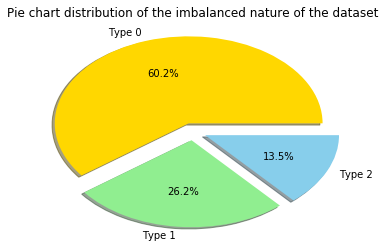

In [15]:
plt.pie(counts, explode = [0.1, 0.1, 0.1], colors = ['gold', 'lightgreen', 'skyblue'],
        labels= ['Type 0', 'Type 1', 'Type 2'], shadow = True, autopct = '%1.1f%%')

plt.title('Pie chart distribution of the imbalanced nature of the dataset')
plt.show()

### Function to visualize confusion matrix for each model:

In [16]:
def make_confusion_matrix(conf_mat, model_name):
    %matplotlib inline
    sns.heatmap(conf_mat, annot = True, fmt = '.1f', cmap = 'Reds', xticklabels= ['Type0', 'Type1', 'Type2'],
               yticklabels= ['Type0', 'Type1', 'Type2'])
    plt.xlabel("Predicted Values")
    plt.ylabel("Actual Values")
    plt.title("Confusion Matrix: %s" % model_name)
    plt.tick_params(axis = 'both', pad = 10)
    plt.show()

### Training a Random Forest on unbalanced dataset

Some of the general steps that will be followed in every model are described below:
-  A random forest model is fit on the unbalanced dataset. The parameters in a random forest model that are most often tunes are number of estimators, criterion and maximum depth of the model.
-  The best values of these parameters are chosen with the hep of GridSearchCV class in scikit learn, which essentially creates a grid of all possible combinations of the selected parameters.
-  But how do we select the 'best' random forest model? Since, the current problem is unbalanced in nature, using default model performance metrics such as accuracy will not be enough. Hence, we need to rely on metrics such as precision, recall, f1 score, etc. which aims at providing better performance criteria for unbalanced classes.
-  In scikit learn, the above mentioned metrics have a really good application for binary classification tasks, but for multiclass classification problems, we need to follow a One vs All approach.
-  Essentially, we can calculate the metric such as precision, recall and f1 score for each of the classes and then decide on averaging these metrics for the entire dataset.
-  There are many ways to average these metrics, we are going to discuss only two: micro and macro. Macro takes an unweighted average of the claculated metrics across all the classes, whereas, micro averaging takes global values of TP, FP, FN for each class and then calculate the desired metric.
-  Macro is not suitable for unbalanced nature of classes whereas, micro is known to perform better.
-  You can find more about muticlass classification metrics and their avrgaing methods in the link below.

In [17]:
### Before applying any data augmentation technique, let's
### fit a random forest classifier to our unbalanced dataset###

parameters = {'n_estimators':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'criterion': ('gini', 'entropy'),
              'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
random_forest_unb = RandomForestClassifier()
clf_random_forest_unb = GridSearchCV(random_forest_unb, parameters, scoring = 'f1_micro')
clf_random_forest_unb.fit(x_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'criterion': ('gini', 'entropy'), 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_micro', verbose=0)

In [18]:
### Printing the best parameters found and the best score ###
print('The best parameters are: ' + str(clf_random_forest_unb.best_params_))
print('The best score is: '+ str(clf_random_forest_unb.best_score_))

The best parameters are: {'criterion': 'gini', 'max_depth': 9, 'n_estimators': 10}
The best score is: 0.6940628637951106


The f1 score of the model is: 0.6778924497555676


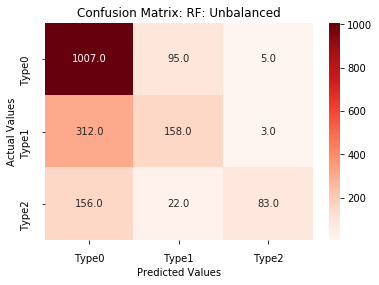

In [19]:
### Getting predictions and evaluation metrics on the test set ###
model_name = 'RF: Unbalanced'
y_pred_rf_unb = clf_random_forest_unb.predict(x_test)
print('The f1 score of the model is: ' + str(f1_score(y_test, y_pred_rf_unb, average= 'micro')))
make_confusion_matrix(confusion_matrix(y_test, y_pred_rf_unb), model_name = model_name)

### Applying resampling to our dataset : First data augmentation technique

-  The first data augmentation technique that we will use is Resampling, or more specifically, upsampling the minority classes to match the majority class.
-  In our case, we have two minority classes, i.e., Type 1 and Type 2. We will resample these classes to match the Type 0 class.

In [20]:
y_train.reset_index(drop = True, inplace = True)

### Merging x_train and y_train into data_train ###
data_train = pd.concat([x_train, y_train], axis = 1, ignore_index= True)

In [21]:
### Renaming the last column to 'y' ###
data_train.rename(columns = {39:'y'}, inplace = True)

In [22]:
data_train_0 = data_train[data_train.y == 'TYPE0']
data_train_1 = data_train[data_train.y == 'TYPE1']
data_train_2 = data_train[data_train.y == 'TYPE2']

### Validating ###
print(data_train.shape, data_train_0.shape, data_train_1.shape, data_train_2.shape)
print(counts)

(4295, 40) (2587, 40) (1127, 40) (581, 40)
y
TYPE0    2587
TYPE1    1127
TYPE2     581
Name: y, dtype: int64


In [23]:
### Resampling with replacement ###
data_train_1_re = data_train_1.sample(n = 2587, replace = True, random_state= 22)
data_train_2_re = data_train_2.sample(n = 2587, replace = True, random_state= 22)

In [24]:
### Combine all the three data sets into one and then reshuffling the rows ###
data_train_re = pd.concat([data_train_0, data_train_1_re, data_train_2_re], ignore_index= True)
data_train_re = data_train_re.sample(frac = 1, random_state= 22).reset_index(drop = True)
print(data_train_re.shape)

(7761, 40)


In [25]:
### Separate the data into x_train_re and y_train_re ###
y_train_re = data_train_re['y']
x_train_re = data_train_re.drop(['y'], axis = 1)

### Fitting a random forest model to our resampled dataset

The best parameters are: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 9}
The best score is: 0.7353433835845896
The f1 score of the model is: 0.6078218359587181


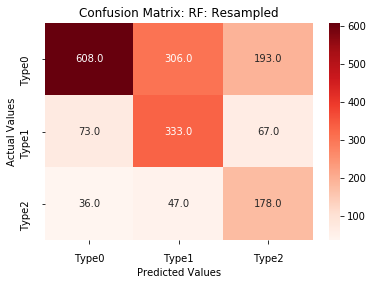

In [26]:
model_name = 'RF: Resampled'
parameters = {'n_estimators':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'criterion': ('gini', 'entropy'),
              'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
random_forest_re = RandomForestClassifier()
clf_random_forest_re = GridSearchCV(random_forest_re, parameters, scoring = 'f1_micro')
clf_random_forest_re.fit(x_train_re, y_train_re)

### Printing the best parameters found and the best score ###
print('The best parameters are: ' + str(clf_random_forest_re.best_params_))
print('The best score is: '+ str(clf_random_forest_re.best_score_))

### Getting predictions and evaluation metrics on the test set ###
y_pred_rf_re = clf_random_forest_re.predict(x_test)
print('The f1 score of the model is: ' + str(f1_score(y_test, y_pred_rf_re, average= 'micro')))
make_confusion_matrix(confusion_matrix(y_test, y_pred_rf_re), model_name = model_name)

### Synthetic Minority Oversampling Technique 

In [27]:
smote = SMOTE(ratio= {'TYPE1' : 2587, 'TYPE2' : 2587}, random_state= 22)
x_train_smote, y_train_smote = smote.fit_sample(x_train, y_train)

In [28]:
print(x_train_smote.shape)
print(y_train_smote.shape)

(7761, 39)
(7761,)


### Fitting a random forest model to our SMOTE dataset

The best parameters are: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 9}
The best score is: 0.7156294291972684
The f1 score of the model is: 0.6279196089082021


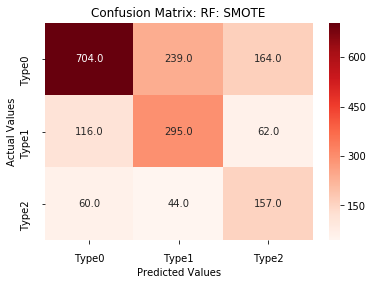

In [29]:
model_name = 'RF: SMOTE'
parameters = {'n_estimators':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'criterion': ('gini', 'entropy'),
              'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
random_forest_smote = RandomForestClassifier()
clf_random_forest_smote = GridSearchCV(random_forest_smote, parameters, scoring = 'f1_micro')
clf_random_forest_smote.fit(x_train_smote, y_train_smote)

### Printing the best parameters found and the best score ###
print('The best parameters are: ' + str(clf_random_forest_smote.best_params_))
print('The best score is: '+ str(clf_random_forest_smote.best_score_))

### Getting predictions and evaluation metrics on the test set ###
y_pred_rf_smote = clf_random_forest_smote.predict(x_test)
print('The f1 score of the model is: ' + str(f1_score(y_test, y_pred_rf_smote, average= 'micro')))
make_confusion_matrix(confusion_matrix(y_test, y_pred_rf_smote), model_name = model_name)

### Downsampling Type0 and SMOTE on TYPE1 and TYPE2

In [30]:
data_train_0_down = data_train_0.sample(n = 1500, replace = False, random_state= 22)
print(data_train_0_down.shape)

(1500, 40)


In [31]:
### Combine all the data sets into one and then reshuffling the rows ###
data_train_down = pd.concat([data_train_0_down, data_train_1, data_train_2], ignore_index= True)
data_train_down = data_train_down.sample(frac = 1, random_state= 22).reset_index(drop = True)
print(data_train_down.shape)

(3208, 40)


In [32]:
### Separate the data into x_train_down and y_train_down ###
y_train_down = data_train_down['y']
x_train_down = data_train_down.drop(['y'], axis = 1)

In [33]:
smote_down = SMOTE(ratio= {'TYPE1' : 1500, 'TYPE2' : 1500}, random_state= 22)
x_train_smote_down, y_train_smote_down = smote_down.fit_sample(x_train_down, y_train_down)

In [34]:
print(x_train_smote_down.shape)
print(y_train_smote_down.shape)

(4500, 39)
(4500,)


The best parameters are: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 10}
The best score is: 0.6851111111111111
The f1 score of the model is: 0.6099945681694731


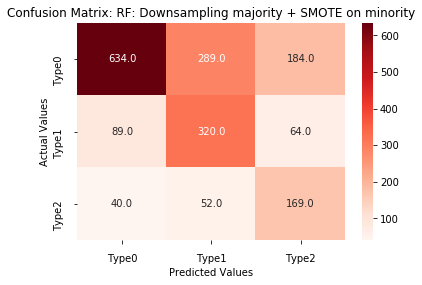

In [35]:
model_name = 'RF: Downsampling majority + SMOTE on minority'
parameters = {'n_estimators':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'criterion': ('gini', 'entropy'),
              'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
random_forest_smote_down = RandomForestClassifier()
clf_random_forest_smote_down = GridSearchCV(random_forest_smote_down, parameters, scoring = 'f1_micro')
clf_random_forest_smote_down.fit(x_train_smote_down, y_train_smote_down)

### Printing the best parameters found and the best score ###
print('The best parameters are: ' + str(clf_random_forest_smote_down.best_params_))
print('The best score is: '+ str(clf_random_forest_smote_down.best_score_))

### Getting predictions and evaluation metrics on the test set ###
y_pred_rf_smote_down = clf_random_forest_smote_down.predict(x_test)
print('The f1 score of the model is: ' + str(f1_score(y_test, y_pred_rf_smote_down, average= 'micro')))
make_confusion_matrix(confusion_matrix(y_test, y_pred_rf_smote_down), model_name = model_name)

### Cross validating before resampling:

-  All of the above models are overfitting on the validation set, since they are not performing equally well on the testing dataset.
- One of the problems that might be affecting the generalization accuracy is that we are resampling first and then cross validating.
- This might lead to overfitting when performing model selection, since a particular sample might appear in both the training as well as validation set.
- To overcome this, we need to cross validate first, and then resample or apply SMOTE.

Let's see if this imporoves our model performance...

In [36]:
### First, Cross validating => Dividing the data into three folds:
def cv_before_re(model, n_est = 10, max_dep =10, crit= 'entropy', C= 5, kernel= 'linear', C_logit = 1000.0):
    np.random.seed(22)
    folds = np.random.choice([1, 2, 3], data_train.shape[0])
    cv_error_folds = []
    for i in range(1, 4):
        data_train_train_cv = data_train[folds != i]
        data_train_val_cv = data_train[folds == i]

        ### Now that we have separated the training and validation sets, let's apply SMOTE
        ### only the training set.
        data_train_train_cv_0 = data_train_train_cv[data_train_train_cv.y == "TYPE0"]
        data_train_train_cv_1 = data_train_train_cv[data_train_train_cv.y == "TYPE1"]
        data_train_train_cv_2 = data_train_train_cv[data_train_train_cv.y == "TYPE2"]
        data_train_train_cv_1_re = data_train_train_cv_1.sample(n = data_train_train_cv_0.shape[0], replace = True,
                                                               random_state = 22)
        data_train_train_cv_2_re = data_train_train_cv_2.sample(n = data_train_train_cv_0.shape[0], replace = True,
                                                               random_state = 22)

        ### Combining all the resampled datasets along with majority unsampled dataset ###
        data_train_train_cv_re = pd.concat([data_train_train_cv_0, data_train_train_cv_1_re,
                                            data_train_train_cv_2_re], ignore_index= True)
        data_train_train_cv_re = data_train_train_cv_re.sample(frac = 1, random_state= 22).reset_index(drop = True)

        ### Let's separate the X and y in validation and resampled training set:
        global x_train_cv_re
        global y_train_cv_re
        x_train_cv_re = data_train_train_cv_re.drop(['y'], axis = 1)
        y_train_cv_re = data_train_train_cv_re['y']
        x_val_cv = data_train_val_cv.drop(['y'], axis = 1)
        y_val_cv = data_train_val_cv['y']

        ### Now let's fit our model to training and evaluate on validation set ###
        if model == 'Random Forest':
            random_forest_cv_re = RandomForestClassifier(n_estimators = n_est, max_depth= max_dep, criterion= crit)
            random_forest_cv_re.fit(x_train_cv_re, y_train_cv_re)
            y_pred_rf_cv_re = random_forest_cv_re.predict(x_val_cv)

            ### Calculating the evaluation metrics ###
            cv_error_folds.append(f1_score(y_val_cv, y_pred_rf_cv_re, average= 'micro'))
        
        elif model == 'SVM':
            svm_cv_re = SVC(C = float(C), kernel = kernel)
            svm_cv_re.fit(x_train_cv_re, y_train_cv_re)
            y_pred_svm_cv_re = svm_cv_re.predict(x_val_cv)

            ### Calculating the evaluation metrics ###
            cv_error_folds.append(f1_score(y_val_cv, y_pred_svm_cv_re, average= 'micro'))
        
        elif model == 'Logistic Regression':
            logit_cv_re = LogisticRegression(C = float(C_logit))
            logit_cv_re.fit(x_train_cv_re, y_train_cv_re)
            y_pred_logit_cv_re = logit_cv_re.predict(x_val_cv)

            ### Calculating the evaluation metrics ###
            cv_error_folds.append(f1_score(y_val_cv, y_pred_logit_cv_re, average= 'micro'))
    
    return(np.mean(cv_error_folds))

### Random Forest model: Cross validation before resampling

In [37]:
n_est = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
max_dep = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
crit = ['entropy', 'gini']
cv_error = []
n_est_list = []
max_dep_list = []
crit_list = []
cv_results = pd.DataFrame()
for p, j, k in product(n_est, max_dep, crit):
    n_est_list.append(p)
    max_dep_list.append(j)
    crit_list.append(k)
    cv_error.append(cv_before_re(n_est= int(p), max_dep= int(j), crit= str(k), model = 'Random Forest'))

cv_results = pd.concat([pd.Series(n_est_list), pd.Series(max_dep_list), pd.Series(crit_list),
                        pd.Series(cv_error)], axis = 1, ignore_index= True)
cv_results.columns = ['No. of estimators', 'Max Depth', 'Criterion', 'F1 Score']
print("Best random forest model corresponds to:\n "
      + str(cv_results[cv_results['F1 Score'] == max(cv_results['F1 Score'])]))

best_n_est_rf = int(cv_results['No. of estimators'][cv_results['F1 Score'] == max(cv_results['F1 Score'])])
best_max_dep_rf = int(cv_results['Max Depth'][cv_results['F1 Score'] == max(cv_results['F1 Score'])])
best_crit_rf = ((cv_results['Criterion'][cv_results['F1 Score'] == max(cv_results['F1 Score'])]).values)[0]

Best random forest model corresponds to:
      No. of estimators  Max Depth Criterion  F1 Score
198                 10         10   entropy  0.625127


The f1 score of the model is: 0.6186854970124932


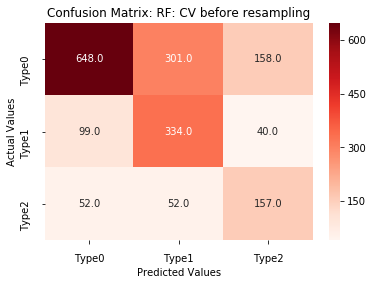

In [38]:
### Let's refit the best model obtained and test it on the testing data ###
model_name = 'RF: CV before resampling'
random_forest_cv_re_refit = RandomForestClassifier(n_estimators = best_n_est_rf, max_depth= best_max_dep_rf,
                                                   criterion= best_crit_rf)
random_forest_cv_re_refit.fit(x_train_cv_re, y_train_cv_re)
y_pred_rf_cv_re_refit = random_forest_cv_re_refit.predict(x_test)

print('The f1 score of the model is: ' + str(f1_score(y_test, y_pred_rf_cv_re_refit, average= 'micro')))
make_confusion_matrix(confusion_matrix(y_test, y_pred_rf_cv_re_refit), model_name = model_name)

### Cross validating before applying SMOTE

In [39]:
### First, Cross validating and then applying SMOTE => Dividing the data into three folds:
def cv_before_smote(model, n_est= 10, max_dep= 10, crit= 'entropy', C= 5, kernel = 'linear', C_logit = 1000.0):
    np.random.seed(22)
    folds = np.random.choice([1, 2, 3], data_train.shape[0])
    cv_error_folds = []
    for i in range(1, 4):
        data_train_train_cv = data_train[folds != i]
        data_train_val_cv = data_train[folds == i]

        ### Now that we have separated the training and validation sets, let's resample
        ### only the training set.
        x_train_train_cv = data_train_train_cv.drop(['y'], axis = 1)
        y_train_train_cv = data_train_train_cv['y']

        global x_train_cv_smote
        global y_train_cv_smote
        smote_cv = SMOTE(ratio= {'TYPE1' : sum(y_train_train_cv == 'TYPE0'),
                                 'TYPE2' : sum(y_train_train_cv == 'TYPE0')}, random_state= 22)
        x_train_cv_smote, y_train_cv_smote = smote_cv.fit_sample(x_train_train_cv, y_train_train_cv)
        
        x_val_cv = data_train_val_cv.drop(['y'], axis = 1)
        y_val_cv = data_train_val_cv['y']

        ### Now let's fit our models to training and evaluate on validation set ###
        if model == 'Random Forest':
            random_forest_cv_smote = RandomForestClassifier(n_estimators = n_est, max_depth= max_dep, criterion= crit)
            random_forest_cv_smote.fit(x_train_cv_smote, y_train_cv_smote)
            y_pred_rf_cv_smote = random_forest_cv_smote.predict(x_val_cv)

            ### Calculating the evaluation metrics ###
            cv_error_folds.append(f1_score(y_val_cv, y_pred_rf_cv_smote, average= 'micro'))
        
        elif model == 'SVM':
            svm_cv_smote = SVC(C = C, kernel = kernel)
            svm_cv_smote.fit(x_train_cv_smote, y_train_cv_smote)
            y_pred_svm_cv_smote = svm_cv_smote.predict(x_val_cv)

            ### Calculating the evaluation metrics ###
            cv_error_folds.append(f1_score(y_val_cv, y_pred_svm_cv_smote, average= 'micro'))
        
        elif model == 'Logistic Regression':
            logit_cv_smote = LogisticRegression(C = C_logit)
            logit_cv_smote.fit(x_train_cv_smote, y_train_cv_smote)
            y_pred_logit_cv_smote = logit_cv_smote.predict(x_val_cv)

            ### Calculating the evaluation metrics ###
            cv_error_folds.append(f1_score(y_val_cv, y_pred_logit_cv_smote, average= 'micro'))
    
    return(np.mean(cv_error_folds))

### Random Forest model: Cross validation before applying SMOTE

In [40]:
### Getting the best RF model on CV before SMOTE ###
n_est = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
max_dep = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
crit = ['entropy', 'gini']
cv_error = []
n_est_list = []
max_dep_list = []
crit_list = []
cv_results = pd.DataFrame()
for p, j, k in product(n_est, max_dep, crit):
    n_est_list.append(p)
    max_dep_list.append(j)
    crit_list.append(k)
    cv_error.append(cv_before_smote(n_est =int(p), max_dep= int(j), crit= str(k), model = 'Random Forest'))

cv_results = pd.concat([pd.Series(n_est_list), pd.Series(max_dep_list), pd.Series(crit_list),
                        pd.Series(cv_error)], axis = 1, ignore_index= True)
cv_results.columns = ['No. of estimators', 'Max Depth', 'Criterion', 'F1 Score']
print("Best random forest model corresponds to:\n "
      + str(cv_results[cv_results['F1 Score'] == max(cv_results['F1 Score'])]))

best_n_est_rf = int(cv_results['No. of estimators'][cv_results['F1 Score'] == max(cv_results['F1 Score'])])
best_max_dep_rf = int(cv_results['Max Depth'][cv_results['F1 Score'] == max(cv_results['F1 Score'])])
best_crit_rf = ((cv_results['Criterion'][cv_results['F1 Score'] == max(cv_results['F1 Score'])]).values)[0]

Best random forest model corresponds to:
      No. of estimators  Max Depth Criterion  F1 Score
196                 10          9   entropy  0.647849


The f1 score of the model is: 0.6360673546985334


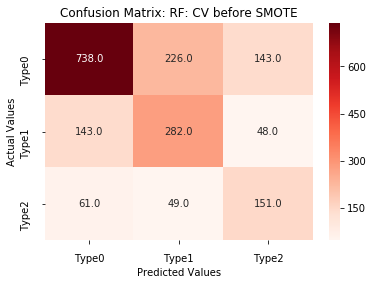

In [41]:
### Let's refit the best model obtained and test it on the testing data ###
model_name = 'RF: CV before SMOTE'
random_forest_cv_smote_refit = RandomForestClassifier(n_estimators = best_n_est_rf, max_depth= best_max_dep_rf,
                                                   criterion= best_crit_rf)
random_forest_cv_smote_refit.fit(x_train_cv_smote, y_train_cv_smote)
y_pred_rf_cv_smote_refit = random_forest_cv_smote_refit.predict(x_test)

print('The f1 score of the model is: ' + str(f1_score(y_test, y_pred_rf_cv_smote_refit, average= 'micro')))
make_confusion_matrix(confusion_matrix(y_test, y_pred_rf_cv_smote_refit), model_name = model_name)

## Support Vector Machines

- Now that we have tried Random Forests models, let's try another ML algorithm to find out how it performs on the unbalanced, resampled and SMOTE datasets.

### SVM on the unbalanced dataset:

The best parameters are: {'C': 0.5, 'kernel': 'linear'}
The best score is: 0.7022118742724098
The f1 score of the model is: 0.6827810972297664


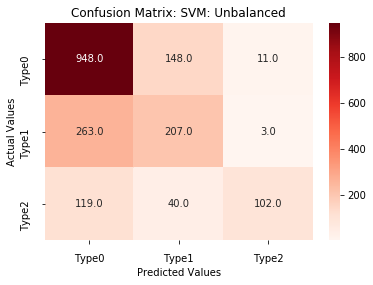

In [42]:
### Before applying any data augmentation technique, let's
### fit a SVM classifier to our unbalanced dataset###

model_name = 'SVM: Unbalanced'
parameters = {'C':[0.01, 0.05, 0.1, 0.5, 0.75, 1.0, 5.0], 'kernel': ('linear', 'poly', 'rbf')}
svm_unb = SVC()
clf_svm_unb = GridSearchCV(svm_unb, parameters, scoring = 'f1_micro')
clf_svm_unb.fit(x_train, y_train)

### Printing the best parameters found and the best score ###
print('The best parameters are: ' + str(clf_svm_unb.best_params_))
print('The best score is: '+ str(clf_svm_unb.best_score_))

### Getting predictions and evaluation metrics on the test set ###
y_pred_svm_unb = clf_svm_unb.predict(x_test)
print('The f1 score of the model is: ' + str(f1_score(y_test, y_pred_svm_unb, average= 'micro')))
make_confusion_matrix(confusion_matrix(y_test, y_pred_svm_unb), model_name = model_name)

### SVM on the resampled dataset:

The best parameters are: {'C': 5.0, 'kernel': 'rbf'}
The best score is: 0.7791521711119701
The f1 score of the model is: 0.6203150461705594


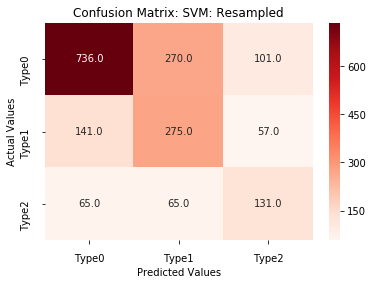

In [43]:
model_name = 'SVM: Resampled'
parameters = {'C':[0.01, 0.05, 0.1, 0.5, 0.75, 1.0, 5.0], 'kernel': ('linear', 'poly', 'rbf')}
svm_re = SVC()
clf_svm_re = GridSearchCV(svm_re, parameters, scoring = 'f1_micro')
clf_svm_re.fit(x_train_re, y_train_re)

### Printing the best parameters found and the best score ###
print('The best parameters are: ' + str(clf_svm_re.best_params_))
print('The best score is: '+ str(clf_svm_re.best_score_))

### Getting predictions and evaluation metrics on the test set ###
y_pred_svm_re = clf_svm_re.predict(x_test)
print('The f1 score of the model is: ' + str(f1_score(y_test, y_pred_svm_re, average= 'micro')))
make_confusion_matrix(confusion_matrix(y_test, y_pred_svm_re), model_name = model_name)

### SVM on the SMOTE dataset:

The best parameters are: {'C': 5.0, 'kernel': 'rbf'}
The best score is: 0.7835330498647082
The f1 score of the model is: 0.6165127648017382


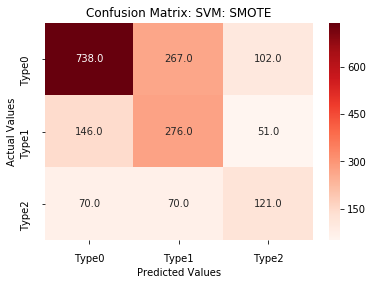

In [44]:
model_name = 'SVM: SMOTE'
parameters = {'C':[0.01, 0.05, 0.1, 0.5, 0.75, 1.0, 5.0], 'kernel': ('linear', 'poly', 'rbf')}
svm_smote = SVC()
clf_svm_smote = GridSearchCV(svm_smote, parameters, scoring = 'f1_micro')
clf_svm_smote.fit(x_train_smote, y_train_smote)

### Printing the best parameters found and the best score ###
print('The best parameters are: ' + str(clf_svm_smote.best_params_))
print('The best score is: '+ str(clf_svm_smote.best_score_))

### Getting predictions and evaluation metrics on the test set ###
y_pred_svm_smote = clf_svm_smote.predict(x_test)
print('The f1 score of the model is: ' + str(f1_score(y_test, y_pred_svm_smote, average= 'micro')))
make_confusion_matrix(confusion_matrix(y_test, y_pred_svm_smote), model_name = model_name)

### SVM: Downsampling Type 0 and SMOTE on Type 1 and Type 2

The best parameters are: {'C': 5.0, 'kernel': 'rbf'}
The best score is: 0.7248888888888889
The f1 score of the model is: 0.6154263986963606


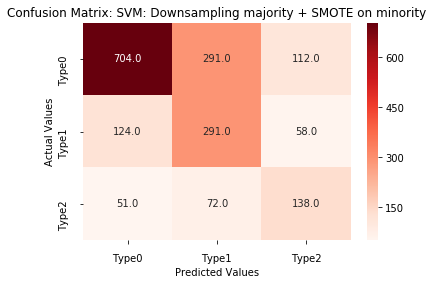

In [45]:
model_name = 'SVM: Downsampling majority + SMOTE on minority'
parameters = {'C':[0.01, 0.05, 0.1, 0.5, 0.75, 1.0, 5.0], 'kernel': ('linear', 'poly', 'rbf')}
svm_smote_down = SVC()
clf_svm_smote_down = GridSearchCV(svm_smote_down, parameters, scoring = 'f1_micro')
clf_svm_smote_down.fit(x_train_smote_down, y_train_smote_down)

### Printing the best parameters found and the best score ###
print('The best parameters are: ' + str(clf_svm_smote_down.best_params_))
print('The best score is: '+ str(clf_svm_smote_down.best_score_))

### Getting predictions and evaluation metrics on the test set ###
y_pred_svm_smote_down = clf_svm_smote_down.predict(x_test)
print('The f1 score of the model is: ' + str(f1_score(y_test, y_pred_svm_smote_down, average= 'micro')))
make_confusion_matrix(confusion_matrix(y_test, y_pred_svm_smote_down), model_name = model_name)

### SVM: Cross validating before resampling:

Best SVM corresponds to:
      C Kernel Type  F1 Score
7  0.1         rbf  0.653979
The f1 score of the model is: 0.6268332428028246


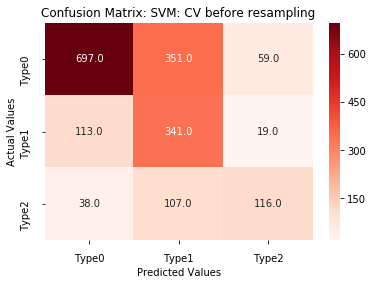

In [46]:
model_name = 'SVM: CV before resampling'
C = [0.01, 0.05, 0.1, 0.5, 0.75, 1.0, 5.0]
kernel = ['linear', 'rbf', 'poly']
cv_error = []
C_list = []
kernel_list = []
cv_results = pd.DataFrame()
for p, j in product(C, kernel):
    C_list.append(p)
    kernel_list.append(j)
    cv_error.append(cv_before_re(C= p, kernel= str(j), model = 'SVM'))

cv_results = pd.concat([pd.Series(C_list), pd.Series(kernel_list),
                        pd.Series(cv_error)], axis = 1, ignore_index= True)
cv_results.columns = ['C', 'Kernel Type', 'F1 Score']
print("Best SVM corresponds to:\n "
      + str(cv_results[cv_results['F1 Score'] == max(cv_results['F1 Score'])]))

best_C_svm = float(cv_results['C'][cv_results['F1 Score'] == max(cv_results['F1 Score'])])
best_kernel_rf = str(((cv_results['Kernel Type'][cv_results['F1 Score'] == max(cv_results['F1 Score'])]).values)[0])


### Let's refit the best model obtained and test it on the testing data ###
svm_cv_re_refit = SVC(C = best_C_svm, kernel= best_kernel_rf)
svm_cv_re_refit.fit(x_train_cv_re, y_train_cv_re)
y_pred_svm_cv_re_refit = svm_cv_re_refit.predict(x_test)

print('The f1 score of the model is: ' + str(f1_score(y_test, y_pred_svm_cv_re_refit, average= 'micro')))
make_confusion_matrix(confusion_matrix(y_test, y_pred_svm_cv_re_refit), model_name = model_name)

### SVM: Cross validating before SMOTE

Best SVM corresponds to:
      C Kernel Type  F1 Score
7  0.1         rbf  0.652607
The f1 score of the model is: 0.6186854970124932


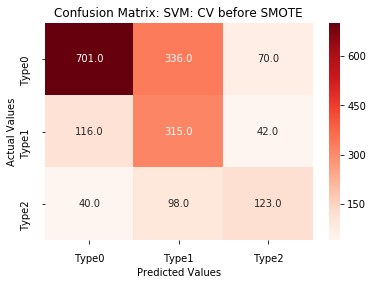

In [47]:
model_name = 'SVM: CV before SMOTE'
C = [0.01, 0.05, 0.1, 0.5, 0.75, 1.0, 5.0]
kernel = ['linear', 'rbf', 'poly']
cv_error = []
C_list = []
kernel_list = []
cv_results = pd.DataFrame()
for p, j in product(C, kernel):
    C_list.append(p)
    kernel_list.append(j)
    cv_error.append(cv_before_smote(C= p, kernel= str(j), model = 'SVM'))

cv_results = pd.concat([pd.Series(C_list), pd.Series(kernel_list),
                        pd.Series(cv_error)], axis = 1, ignore_index= True)
cv_results.columns = ['C', 'Kernel Type', 'F1 Score']
print("Best SVM corresponds to:\n "
      + str(cv_results[cv_results['F1 Score'] == max(cv_results['F1 Score'])]))

best_C_svm_1 = (cv_results['C'][cv_results['F1 Score'] == max(cv_results['F1 Score'])])
best_kernel_rf_1 = ((cv_results['Kernel Type'][cv_results['F1 Score'] == max(cv_results['F1 Score'])]).values)[0]


### Let's refit the best model obtained and test it on the testing data ###
svm_cv_smote_refit = SVC(C = best_C_svm_1, kernel= best_kernel_rf_1)
svm_cv_smote_refit.fit(x_train_cv_smote, y_train_cv_smote)
y_pred_svm_cv_smote_refit = svm_cv_smote_refit.predict(x_test)

print('The f1 score of the model is: ' + str(f1_score(y_test, y_pred_svm_cv_smote_refit, average= 'micro')))
make_confusion_matrix(confusion_matrix(y_test, y_pred_svm_cv_smote_refit), model_name = model_name)

## Logistic Regression

### Logistic Regression on unbalanced dataset:

The best parameters are: {'C': 1000}
The best score is: 0.7029103608847497
The f1 score of the model is: 0.6795219989136339


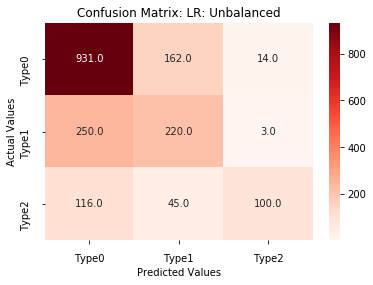

In [48]:
### Before applying any data augmentation technique, let's
### fit a logistic regression classifier to our unbalanced dataset###

model_name = 'LR: Unbalanced'
parameters = {'C':[1.0, 5.0, 10, 100, 1000]}
logit_unb = LogisticRegression()
clf_logit_unb = GridSearchCV(logit_unb, parameters, scoring = 'f1_micro')
clf_logit_unb.fit(x_train, y_train)

### Printing the best parameters found and the best score ###
print('The best parameters are: ' + str(clf_logit_unb.best_params_))
print('The best score is: '+ str(clf_logit_unb.best_score_))

### Getting predictions and evaluation metrics on the test set ###
y_pred_logit_unb = clf_logit_unb.predict(x_test)
print('The f1 score of the model is: ' + str(f1_score(y_test, y_pred_logit_unb, average= 'micro')))
make_confusion_matrix(confusion_matrix(y_test, y_pred_logit_unb), model_name = model_name)

### Logistic regression on resampled dataset:

The best parameters are: {'C': 1000}
The best score is: 0.6463084654039428
The f1 score of the model is: 0.6273764258555133


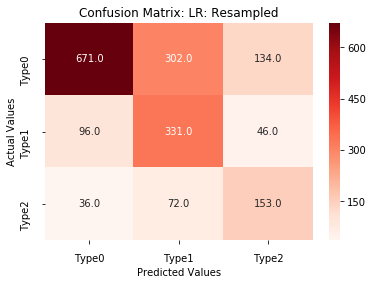

In [49]:
model_name = 'LR: Resampled'
parameters = {'C':[1.0, 5.0, 10, 100, 1000]}
logit_re = LogisticRegression()
clf_logit_re = GridSearchCV(logit_re, parameters, scoring = 'f1_micro')
clf_logit_re.fit(x_train_re, y_train_re)

### Printing the best parameters found and the best score ###
print('The best parameters are: ' + str(clf_logit_re.best_params_))
print('The best score is: '+ str(clf_logit_re.best_score_))

### Getting predictions and evaluation metrics on the test set ###
y_pred_logit_re = clf_logit_re.predict(x_test)
print('The f1 score of the model is: ' + str(f1_score(y_test, y_pred_logit_re, average= 'micro')))
make_confusion_matrix(confusion_matrix(y_test, y_pred_logit_re), model_name = model_name)

### Logistic regression on SMOTE:

The best parameters are: {'C': 1000}
The best score is: 0.6671820641669888
The f1 score of the model is: 0.625746876697447
The confusion matrix of the model is:
 [[672 282 153]
 [102 321  50]
 [ 32  70 159]]


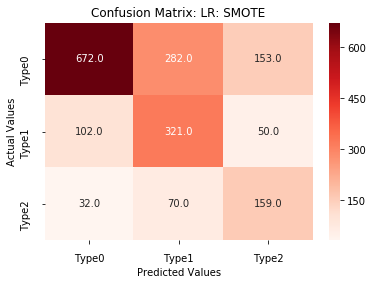

In [50]:
model_name = 'LR: SMOTE'
parameters = {'C':[1.0, 5.0, 10, 100, 1000]}
logit_smote = LogisticRegression()
clf_logit_smote = GridSearchCV(logit_smote, parameters, scoring = 'f1_micro')
clf_logit_smote.fit(x_train_smote, y_train_smote)

### Printing the best parameters found and the best score ###
print('The best parameters are: ' + str(clf_logit_smote.best_params_))
print('The best score is: '+ str(clf_logit_smote.best_score_))

### Getting predictions and evaluation metrics on the test set ###
y_pred_logit_smote = clf_logit_smote.predict(x_test)
print('The f1 score of the model is: ' + str(f1_score(y_test, y_pred_logit_smote, average= 'micro')))
print('The confusion matrix of the model is:\n '+
      str(confusion_matrix(y_test, y_pred_logit_smote)))
make_confusion_matrix(confusion_matrix(y_test, y_pred_logit_smote), model_name = model_name)

### Logistic Regression: Downsampling Type 0 and SMOTE on Type 1 and Type 2

The best parameters are: {'C': 1000}
The best score is: 0.6548888888888889
The f1 score of the model is: 0.6284627919608908


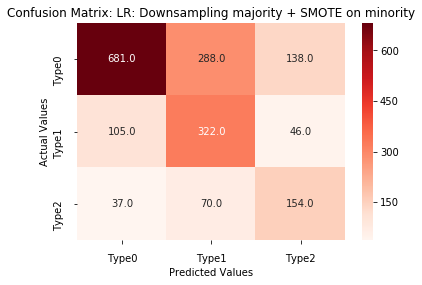

In [51]:
model_name = 'LR: Downsampling majority + SMOTE on minority'
parameters = {'C':[1.0, 5.0, 10, 100, 1000]}
logit_smote_down = LogisticRegression()
clf_logit_smote_down = GridSearchCV(logit_smote_down, parameters, scoring = 'f1_micro')
clf_logit_smote_down.fit(x_train_smote_down, y_train_smote_down)

### Printing the best parameters found and the best score ###
print('The best parameters are: ' + str(clf_logit_smote_down.best_params_))
print('The best score is: '+ str(clf_logit_smote_down.best_score_))

### Getting predictions and evaluation metrics on the test set ###
y_pred_logit_smote_down = clf_logit_smote_down.predict(x_test)
print('The f1 score of the model is: ' + str(f1_score(y_test, y_pred_logit_smote_down, average= 'micro')))
make_confusion_matrix(confusion_matrix(y_test, y_pred_logit_smote_down), model_name = model_name)

### Logistic regression: Cross validating before resampling

Best logistic regression model corresponds to:
         C  F1 Score
4  1000.0  0.634473
The f1 score of the model is: 0.6094513851167843


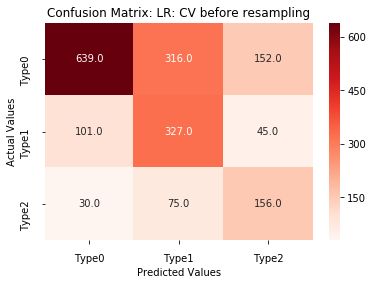

In [52]:
model_name = 'LR: CV before resampling'
C = [1.0, 5.0, 10.0, 100.0, 1000.0]
cv_error = []
C_list = []
cv_results = pd.DataFrame()
for p in C:
    C_list.append(p)
    cv_error.append(cv_before_re(C_logit= p, model = 'Logistic Regression'))

cv_results = pd.concat([pd.Series(C_list),
                        pd.Series(cv_error)], axis = 1, ignore_index= True)
cv_results.columns = ['C', 'F1 Score']
print("Best logistic regression model corresponds to:\n "
      + str(cv_results[cv_results['F1 Score'] == max(cv_results['F1 Score'])]))

best_C_logit = float(cv_results['C'][cv_results['F1 Score'] == max(cv_results['F1 Score'])])


### Let's refit the best model obtained and test it on the testing data ###
logit_cv_re_refit = LogisticRegression(C = best_C_logit)
logit_cv_re_refit.fit(x_train_cv_re, y_train_cv_re)
y_pred_logit_cv_re_refit = logit_cv_re_refit.predict(x_test)

print('The f1 score of the model is: ' + str(f1_score(y_test, y_pred_logit_cv_re_refit, average= 'micro')))
make_confusion_matrix(confusion_matrix(y_test, y_pred_logit_cv_re_refit), model_name = model_name)

### Logistic Regression: Cross Validating before applying SMOTE:

Best logistic regression corresponds to:
         C  F1 Score
4  1000.0  0.640412
The f1 score of the model is: 0.6137968495382944


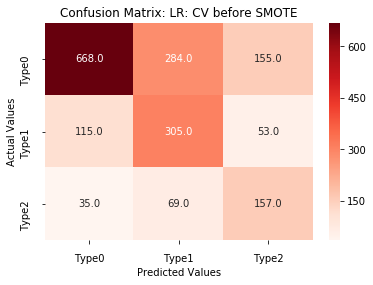

In [53]:
model_name = 'LR: CV before SMOTE'
C = [1.0, 5.0, 10.0, 100.0, 1000.0]
cv_error = []
C_list = []
cv_results = pd.DataFrame()
for p in C:
    C_list.append(p)
    cv_error.append(cv_before_smote(C_logit= float(p), model = 'Logistic Regression'))

cv_results = pd.concat([pd.Series(C_list),
                        pd.Series(cv_error)], axis = 1, ignore_index= True)
cv_results.columns = ['C', 'F1 Score']
print("Best logistic regression corresponds to:\n "
      + str(cv_results[cv_results['F1 Score'] == max(cv_results['F1 Score'])]))

best_C_logit_1 = float(cv_results['C'][cv_results['F1 Score'] == max(cv_results['F1 Score'])])


### Let's refit the best model obtained and test it on the testing data ###
logit_cv_smote_refit = LogisticRegression(C = best_C_logit_1)
logit_cv_smote_refit.fit(x_train_cv_smote, y_train_cv_smote)
y_pred_logit_cv_smote_refit = logit_cv_smote_refit.predict(x_test)

print('The f1 score of the model is: ' + str(f1_score(y_test, y_pred_logit_cv_smote_refit, average= 'micro')))
make_confusion_matrix(confusion_matrix(y_test, y_pred_logit_cv_smote_refit), model_name = model_name)

### Pipeline: SMOTE -- Feature Selection -- Hyperparameter Tuning

In [54]:
x_train.drop(labels = 13, axis = 1, inplace= True)
x_test.drop(axis = 1, labels = 13, inplace= True)

The best parameters are: {'clf__max_depth': 25, 'clf__n_estimators': 35, 'feature_selection__k': 35}
The best score is: 0.6849825378346915
The f1 score of the model is: 0.6822379141770777


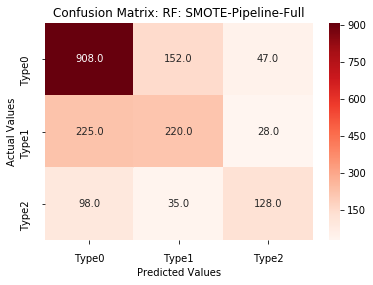

             precision    recall  f1-score   support

      TYPE0       0.74      0.82      0.78      1107
      TYPE1       0.54      0.47      0.50       473
      TYPE2       0.63      0.49      0.55       261

avg / total       0.67      0.68      0.67      1841



In [55]:
### Random Forest Pipeline ###
skf = StratifiedKFold()
selectKB = SelectKBest()
pipe_new = imbPipeline([('oversample', SMOTE(ratio= {'TYPE1' : 1600, 'TYPE2' : 1600}, random_state=22)),
                        ('feature_selection', selectKB),
                        ('clf', RandomForestClassifier(random_state=22, n_jobs=-1))])

parameters = {'clf__n_estimators':[5, 10, 15, 20, 25, 30, 35],'clf__max_depth': [5, 10, 15, 20, 25, 50, 75, 100],
              'feature_selection__k':[10, 20, 30, 35]}
grid_rf_new = GridSearchCV(pipe_new, parameters, n_jobs=-1, scoring='f1_micro', cv= skf)

grid_rf_new.fit(x_train, y_train)
### Printing the best parameters found and the best score ###
print('The best parameters are: ' + str(grid_rf_new.best_params_))
print('The best score is: '+ str(grid_rf_new.best_score_))


### Getting predictions and evaluation metrics on the test set ###
model_name = 'RF: SMOTE-Pipeline-Full'
y_pred_rf_new = grid_rf_new.predict(x_test)
print('The f1 score of the model is: ' + str(f1_score(y_test, y_pred_rf_new, average= 'micro')))
make_confusion_matrix(confusion_matrix(y_test, y_pred_rf_new), model_name = model_name)
print(classification_report(y_test, y_pred_rf_new))

The best parameters are: {'clf__C': 0.1, 'clf__kernel': 'rbf', 'feature_selection__k': 35}
The best score is: 0.6614668218859139
The f1 score of the model is: 0.6588810429114612


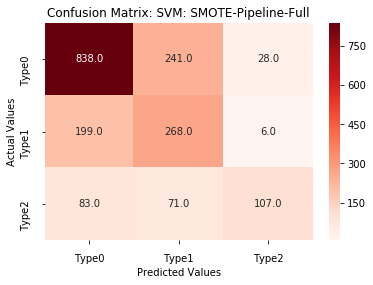

             precision    recall  f1-score   support

      TYPE0       0.75      0.76      0.75      1107
      TYPE1       0.46      0.57      0.51       473
      TYPE2       0.76      0.41      0.53       261

avg / total       0.68      0.66      0.66      1841



In [56]:
### SVM Pipeline ###
skf = StratifiedKFold()
selectKB = SelectKBest()
pipe_new = imbPipeline([('oversample', SMOTE(ratio= {'TYPE1' : 1600, 'TYPE2' : 1600}, random_state=22)),
                        ('feature_selection', selectKB),
                        ('clf', SVC(random_state=22))])

parameters = {'clf__C':[0.01, 0.1, 1, 10],'clf__kernel': ['rbf'],
              'feature_selection__k':[10, 20, 30, 35]}
grid_svm_new = GridSearchCV(pipe_new, parameters, n_jobs=-1, scoring='f1_micro', cv= skf)

grid_svm_new.fit(x_train, y_train)
### Printing the best parameters found and the best score ###
print('The best parameters are: ' + str(grid_svm_new.best_params_))
print('The best score is: '+ str(grid_svm_new.best_score_))


### Getting predictions and evaluation metrics on the test set ###
model_name = 'SVM: SMOTE-Pipeline-Full'
y_pred_svm_new = grid_svm_new.predict(x_test)
print('The f1 score of the model is: ' + str(f1_score(y_test, y_pred_svm_new, average= 'micro')))
make_confusion_matrix(confusion_matrix(y_test, y_pred_svm_new), model_name = model_name)
print(classification_report(y_test, y_pred_svm_new))

The best parameters are: {'clf__C': 1000.0, 'feature_selection__k': 30}
The best score is: 0.6461001164144354
The f1 score of the model is: 0.652362846279196


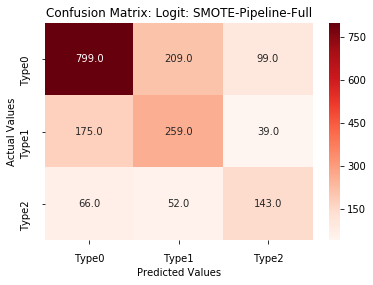

             precision    recall  f1-score   support

      TYPE0       0.77      0.72      0.74      1107
      TYPE1       0.50      0.55      0.52       473
      TYPE2       0.51      0.55      0.53       261

avg / total       0.66      0.65      0.66      1841



In [57]:
### Logistic Regression - Pipeline ###
skf = StratifiedKFold()
selectKB = SelectKBest()
pipe_new = imbPipeline([('oversample', SMOTE(ratio= {'TYPE1' : 1600, 'TYPE2' : 1600},random_state=22)),
                        ('feature_selection', selectKB),
                        ('clf', LogisticRegression(random_state=22))])

parameters = {'clf__C':[1.0, 5.0, 10.0, 100.0, 1000.0, 1500.0], 'feature_selection__k':[10, 20, 30, 35]}
grid_logit_new = GridSearchCV(pipe_new, parameters, n_jobs=-1, scoring='f1_micro')

grid_logit_new.fit(x_train, y_train)
### Printing the best parameters found and the best score ###
print('The best parameters are: ' + str(grid_logit_new.best_params_))
print('The best score is: '+ str(grid_logit_new.best_score_))


### Getting predictions and evaluation metrics on the test set ###
model_name = 'Logit: SMOTE-Pipeline-Full'
y_pred_logit_new = grid_logit_new.predict(x_test)
print('The f1 score of the model is: ' + str(f1_score(y_test, y_pred_logit_new, average = 'micro')))
make_confusion_matrix(confusion_matrix(y_test, y_pred_logit_new), model_name = model_name)
print(classification_report(y_test, y_pred_logit_new))

The best parameters are: {'clf__max_depth': 15, 'clf__n_estimators': 20, 'feature_selection__k': 35}
The best score is: 0.6682188591385332
The f1 score of the model is: 0.6605105920695274


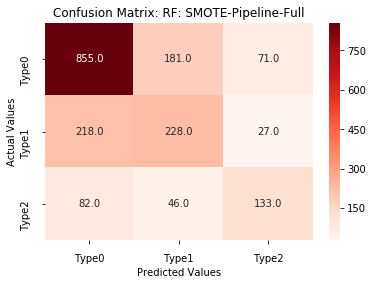

             precision    recall  f1-score   support

      TYPE0       0.74      0.77      0.76      1107
      TYPE1       0.50      0.48      0.49       473
      TYPE2       0.58      0.51      0.54       261

avg / total       0.66      0.66      0.66      1841



In [58]:
### XGBoost - Pipeline ###
skf = StratifiedKFold()
selectKB = SelectKBest()
pipe_new = imbPipeline([('oversample', SMOTE(ratio= {'TYPE1' : 1600, 'TYPE2' : 1600}, random_state=22)),
                        ('feature_selection', selectKB),
                        ('clf', XGBClassifier(random_state=22, n_jobs=-1))])

parameters = {'clf__n_estimators':[5, 10, 15, 20],
              'clf__max_depth': [5, 10, 15, 20, 25, 50, 100], 'feature_selection__k':[10, 20, 30, 35]}
grid_xgb_new = GridSearchCV(pipe_new, parameters, n_jobs=-1, scoring='f1_micro', cv= skf)

grid_xgb_new.fit(x_train, y_train)
### Printing the best parameters found and the best score ###
print('The best parameters are: ' + str(grid_xgb_new.best_params_))
print('The best score is: '+ str(grid_xgb_new.best_score_))


### Getting predictions and evaluation metrics on the test set ###
model_name = 'RF: SMOTE-Pipeline-Full'
y_pred_xgb_new = grid_xgb_new.predict(x_test)
print('The f1 score of the model is: ' + str(f1_score(y_test, y_pred_xgb_new, average = 'micro')))
make_confusion_matrix(confusion_matrix(y_test, y_pred_xgb_new), model_name = model_name)
print(classification_report(y_test, y_pred_xgb_new))

### Results and Conclusion:

- As seen in this analysis, different data augmentation techniques were tried alongside different machine learning algorithms.
- The main purpose of this analysis was not to portray the best data augmentation technique or the best performing machine learning algorithm on unbalanced dataset. Rather, I wanted to follow fundamentally strong and conceptually profound techniques which would give me a deeper insight into how the data augmentation techniques works in combination with some of the best machine learning algorithms.
- That goal is certainly achieved as it was seen that any data augmentation technique (resampling minority, SMOTE, downsampling + SMOTE) can still overfit our training data.
- The problem of overfitting was then resolved by creating a custom function which would cross validate first before applying the various data augmentation techniques.
-  Instead of creating a custom function, which can get convoluted at times, I made use of imblearn's Pipeline to create a pipeline of SMOTE --- Feature Selection --- Classifier with Hyperparameter Tuning.
-  As it turns out, the pipeline for Random Forest Classifier gives the best F1 score on the test dataset.
- Although this does not single out a machine learning algorithm but it significantly reduces the overfitting.
- Conclusively, through this analysis I discovered how data augmentation techniques work and how to best use them with machine learning algorithm and overcome the common pitfalls that one might fall into, if they are not careful while applying these techniques.